In [1]:
from Cutout_funct import mk_hst_cutout, mk_hsc_cutout, mk_psf_cube, get_hst_psf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('image', cmap='gist_stern')
matplotlib.rc('image', interpolation='none')

/Users/remy/opt/anaconda3/lib/python3.8/site-packages/proxmin-0.6.11-py3.8.egg/proxmin/nmf.py:64: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if W is 1:


In [2]:
cut = mk_hst_cutout('hst_10886_02_acs_wfc_f814w_j9op02_drc.fits', 
                    (3568, 2226), 
                    (200, 200), ind = 1,
                    path='../Lens_deblend/Multi-resolution/')

cut = mk_hst_cutout('0001_150.54667000_2.19417000_acs_I_mosaic_30mas_sci.fits',
                   (8324, 8308),
                   (400,400), ind = 0,
                   path='../Lens_deblend/Multi-resolution/COSMOS0211/')

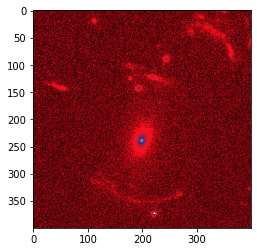

In [3]:
plt.imshow(cut.data)
plt.show()

90
90
90
90
90


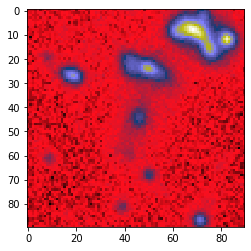

In [4]:
hsc_files = ['4-cutout-HSC-G-9813-pdr2_dud.fits',
            '5-cutout-HSC-R-9813-pdr2_dud.fits',
            '6-cutout-HSC-I-9813-pdr2_dud.fits',
            '7-cutout-HSC-Z-9813-pdr2_dud.fits',
            '8-cutout-HSC-Y-9813-pdr2_dud.fits']
cube_hsc = mk_hsc_cutout(hsc_files, pos = (57,63), size = 90, 
                         path = '../Lens_deblend/Multi-resolution/COSMOS0211/', 
                         patch = True)
plt.imshow(cube_hsc[0])
plt.show()

psfs = mk_psf_cube(['8-psf-calexp-pdr2_dud-HSC-Y-9813-2,4-150.54667-2.19417.fits',
'4-psf-calexp-pdr2_dud-HSC-G-9813-2,4-150.54667-2.19417.fits',
'5-psf-calexp-pdr2_dud-HSC-R-9813-2,4-150.54667-2.19417.fits',
'6-psf-calexp-pdr2_dud-HSC-I-9813-2,4-150.54667-2.19417.fits',
'7-psf-calexp-pdr2_dud-HSC-Z-9813-2,4-150.54667-2.19417.fits'], 
                  path='../Lens_deblend/Multi-resolution/psf_0211/')

/Users/remy/Desktop/git_repos/Cutouts/Cutout_funct.py:99: RuntimeWarning: invalid value encountered in sqrt
  plt.imshow(np.sqrt(star))


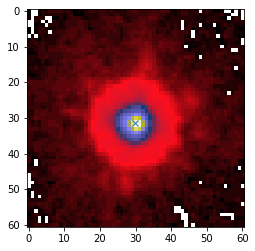

/Users/remy/Desktop/git_repos/Cutouts/Cutout_funct.py:108: RuntimeWarning: invalid value encountered in sqrt
  plt.imshow(np.sqrt(psf))


[29.80283558] [31.42518557] (array([0.19716442]), array([-1.42518557]))


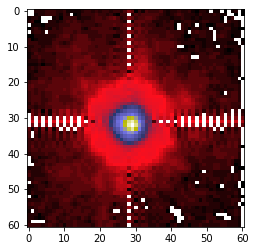

In [5]:
psf = get_hst_psf('0001_150.54667000_2.19417000_acs_I_mosaic_30mas_sci.fits', 
                  (9514, 9363),
                  size = 61,
                  path = '../Lens_deblend/Multi-resolution/COSMOS0211/')

[28.33133407] [31.63072042]


<ipython-input-6-169cd740ae41>:3: RuntimeWarning: invalid value encountered in sqrt
  bkg = sep.Background(np.sqrt(psf))
<ipython-input-6-169cd740ae41>:7: RuntimeWarning: invalid value encountered in sqrt
  plt.imshow(np.sqrt(psf))


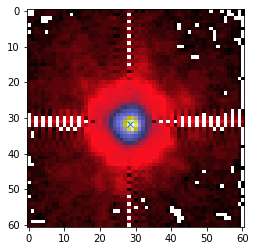

In [6]:
import sep
psf = np.asarray(psf, order='C')
bkg = sep.Background(np.sqrt(psf))
catalog = sep.extract(psf, 3, err=bkg.globalrms)
print(catalog['x'], catalog['y'])

plt.imshow(np.sqrt(psf))
plt.plot(catalog['x'], catalog['y'], 'x')
plt.show()